In [17]:
#dependencies
from config import api_key
from citipy import citipy
import json
import requests
import csv
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
#building base query url
url=f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units=imperial&q="

In [19]:
namelist=[]
dataframe = pd.DataFrame(columns=["City Name", "Latitude", "Longitude", "Temperature", "Humidity", "Clouds", "Wind"])
x=0
while 1: #fills the base dataframe with random latitudes and longitudes
    if len(namelist)<500:
        lat= (random.random()* 180) - 90 #returns a random latitude- any number from -90 to +90
        lon= (random.random()* 360) - 180 #returns a random longitude- any number from -180 to +180
        name = str(citipy.nearest_city(lat,lon).city_name)
        try: #in case a city name from citipy is not recognized by open weather map
            if name not in namelist: #makes sure that no cities are repeated
                response = requests.get(url+name).json()
                dataframe.loc[x,"City Name"] = response["name"]
                dataframe.loc[x,"Latitude"] = response["coord"]["lat"]
                dataframe.loc[x,"Longitude"] = response["coord"]["lon"]
                dataframe.loc[x,"Temperature"] = response["main"]["temp"]
                dataframe.loc[x,"Humidity"] = response["main"]["humidity"]
                dataframe.loc[x,"Clouds"] = response["clouds"]["all"]
                dataframe.loc[x,"Wind"] = response["wind"]["speed"]
                x=x+1
                namelist.append(name)
        except:
            x=x
    else:
        break

#still need to create print log and csv but otherwise this is DONE.

In [20]:
dataframe.head()

,City Name,Latitude,Longitude,Temperature,Humidity,Clouds,Wind
0,Severo-Kurilsk,50.68,156.12,33.2,96,32,4.83
1,Avarua,-21.21,-159.78,77,94,90,8.05
2,Bethel,60.79,-161.76,35.6,74,90,10.29
3,Barrow,-38.31,-60.23,51.11,61,0,11.1
4,Mataura,-46.19,168.86,64.84,57,88,20.04


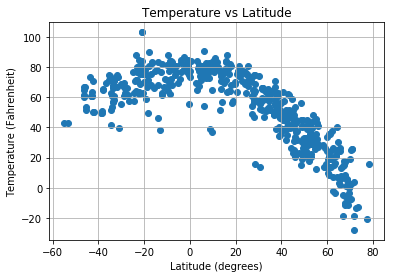

In [21]:
plt.scatter(dataframe["Latitude"],dataframe["Temperature"])
plt.title("Temperature vs Latitude")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Temperature (Fahrenheit)")
plt.grid(True)
plt.savefig("TempLat.png")
plt.show()

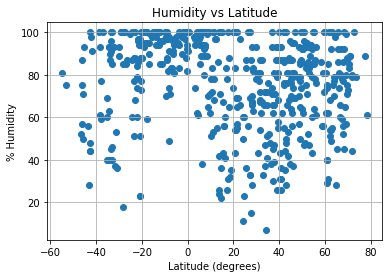

In [22]:
plt.scatter(dataframe["Latitude"],dataframe["Humidity"])
plt.title("Humidity vs Latitude")
plt.xlabel("Latitude (degrees)")
plt.ylabel("% Humidity")
plt.grid(True)
plt.savefig("HumidLat.png")
plt.show()

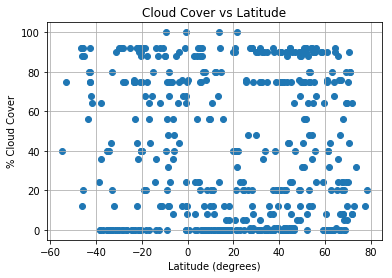

In [23]:
plt.scatter(dataframe["Latitude"],dataframe["Clouds"])
plt.title("Cloud Cover vs Latitude")
plt.xlabel("Latitude (degrees)")
plt.ylabel("% Cloud Cover")
plt.grid(True)
plt.savefig("CloudLat.png")
plt.show()

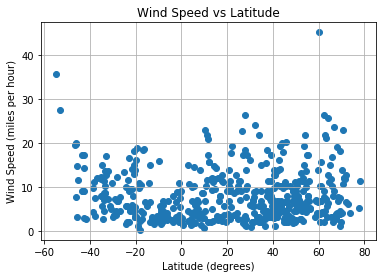

In [24]:
plt.scatter(dataframe["Latitude"],dataframe["Wind"])
plt.title("Wind Speed vs Latitude")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Wind Speed (miles per hour)")
plt.grid(True)
plt.savefig("WindLat.png")
plt.show()